<a href="https://colab.research.google.com/github/Hina-softwareEngineer/heart_failure_prediction/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Description of Dataset taken from Kaggle

[DataSet Link is here](https://www.kaggle.com/fedesoriano/heart-failure-prediction)

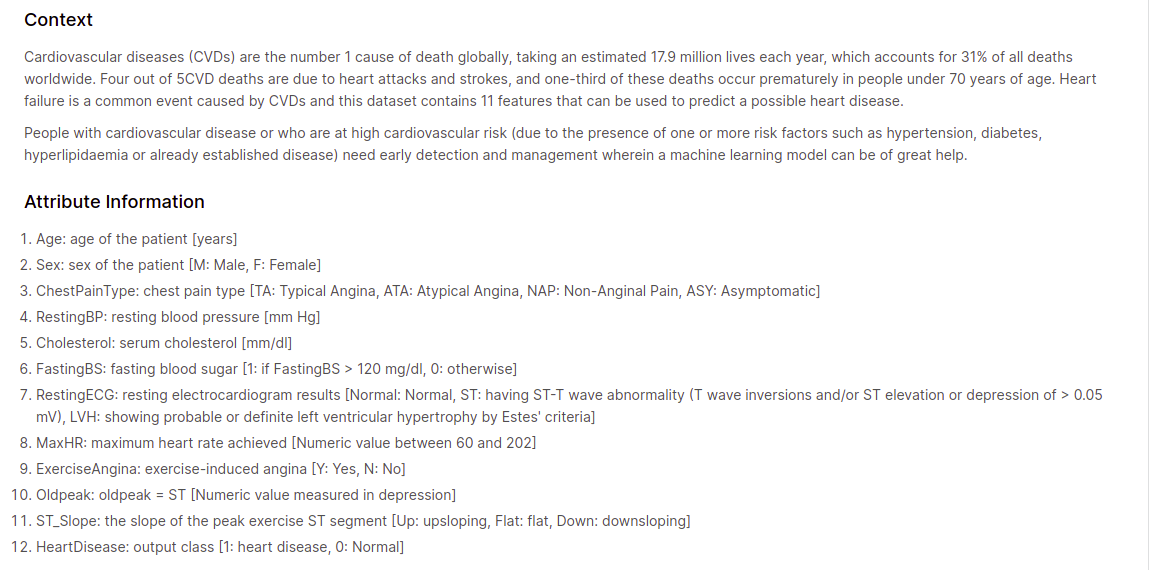

In [ ]:
filePath = '/content/drive/MyDrive/Kaggle/heart.csv'

df = pd.read_csv(filePath)
dataset = pd.read_csv(filePath)

In [ ]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
dataset.shape

(918, 12)

In [ ]:
# checking about the class imbalancing
print("Patients who have disease", dataset['HeartDisease'].sum())
print("Patients who don't have disease", dataset.shape[0] - dataset['HeartDisease'].sum())

Patients who have disease 508
Patients who don't have disease 410


In [ ]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
print(dataset.Sex.unique())
print(dataset.ChestPainType.unique())
print(dataset.RestingECG.unique())
print(dataset.ExerciseAngina.unique())
print(dataset.ST_Slope.unique())

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


In [ ]:
# Label Encoding
dataset['Sex'] = dataset.Sex.map({'M': 0, 'F' : 1})
dataset['ChestPainType'] = dataset.ChestPainType.map({'ATA' : 0, 'NAP' : 1, "ASY" : 2, "TA" : 3})
dataset['RestingECG'] = dataset.RestingECG.map({'Normal' : 0, 'ST' : 1,  'LVH': 2})
dataset['ExerciseAngina'] = dataset.ExerciseAngina.map({'N' : 0, 'Y' : 1})
dataset['ST_Slope'] = dataset.ST_Slope.map({'Up' : 0, 'Flat' : 1, 'Down' : 2})


dataset.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1
917,38,0,1,138,175,0,0,173,0,0.0,0,0


(array([ 12.,  37.,  86., 104., 148., 201., 175., 101.,  39.,  15.]),
 array([28. , 32.9, 37.8, 42.7, 47.6, 52.5, 57.4, 62.3, 67.2, 72.1, 77. ]),
 <a list of 10 Patch objects>)

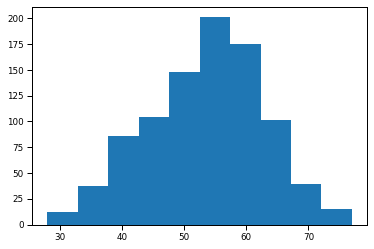

In [ ]:
plt.hist(dataset.Age)

(array([725.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 193.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

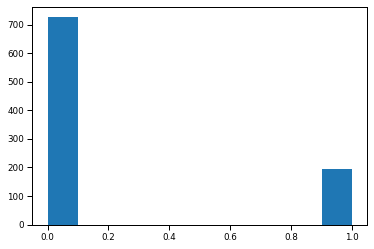

In [ ]:
plt.hist(dataset.Sex)

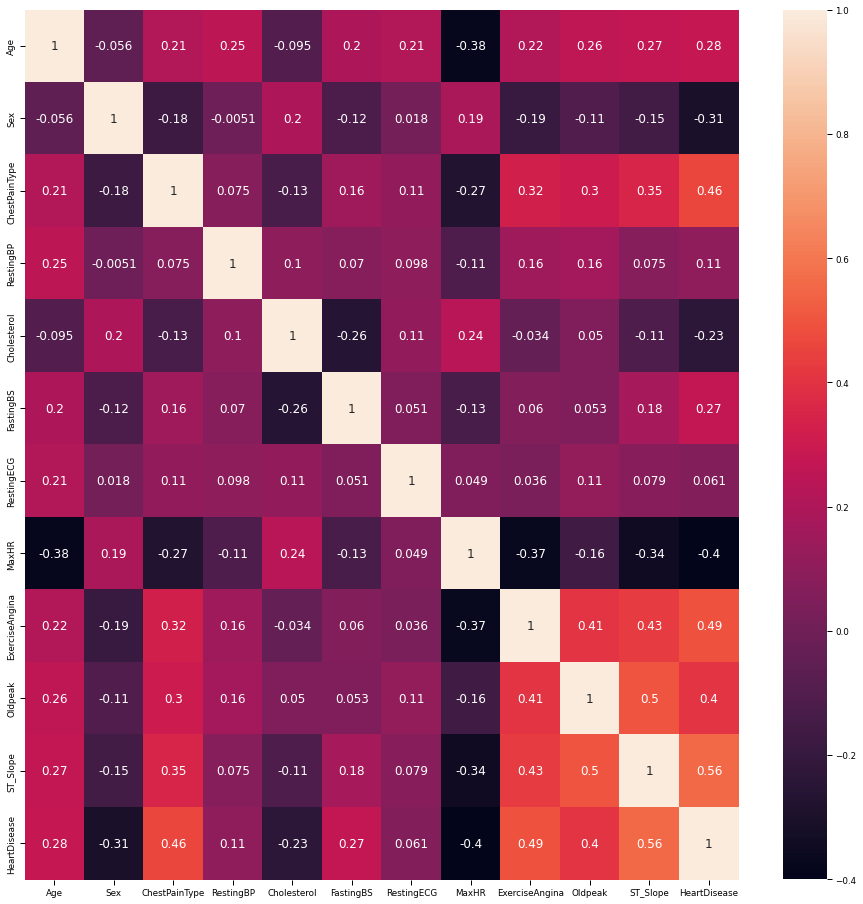

In [ ]:
plt.figure(figsize = (16,16))
sns.heatmap(dataset.corr(), annot=True)

No handles with labels found to put in legend.


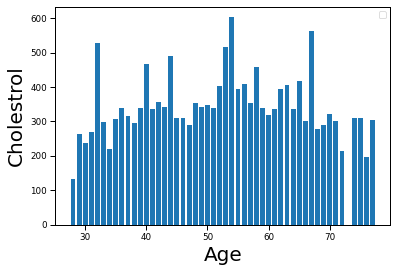

In [ ]:
plt.bar(dataset.Age, dataset.Cholesterol )
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


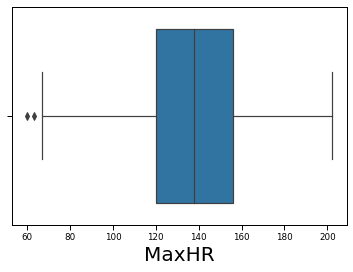

In [ ]:
sns.boxplot(dataset.MaxHR)

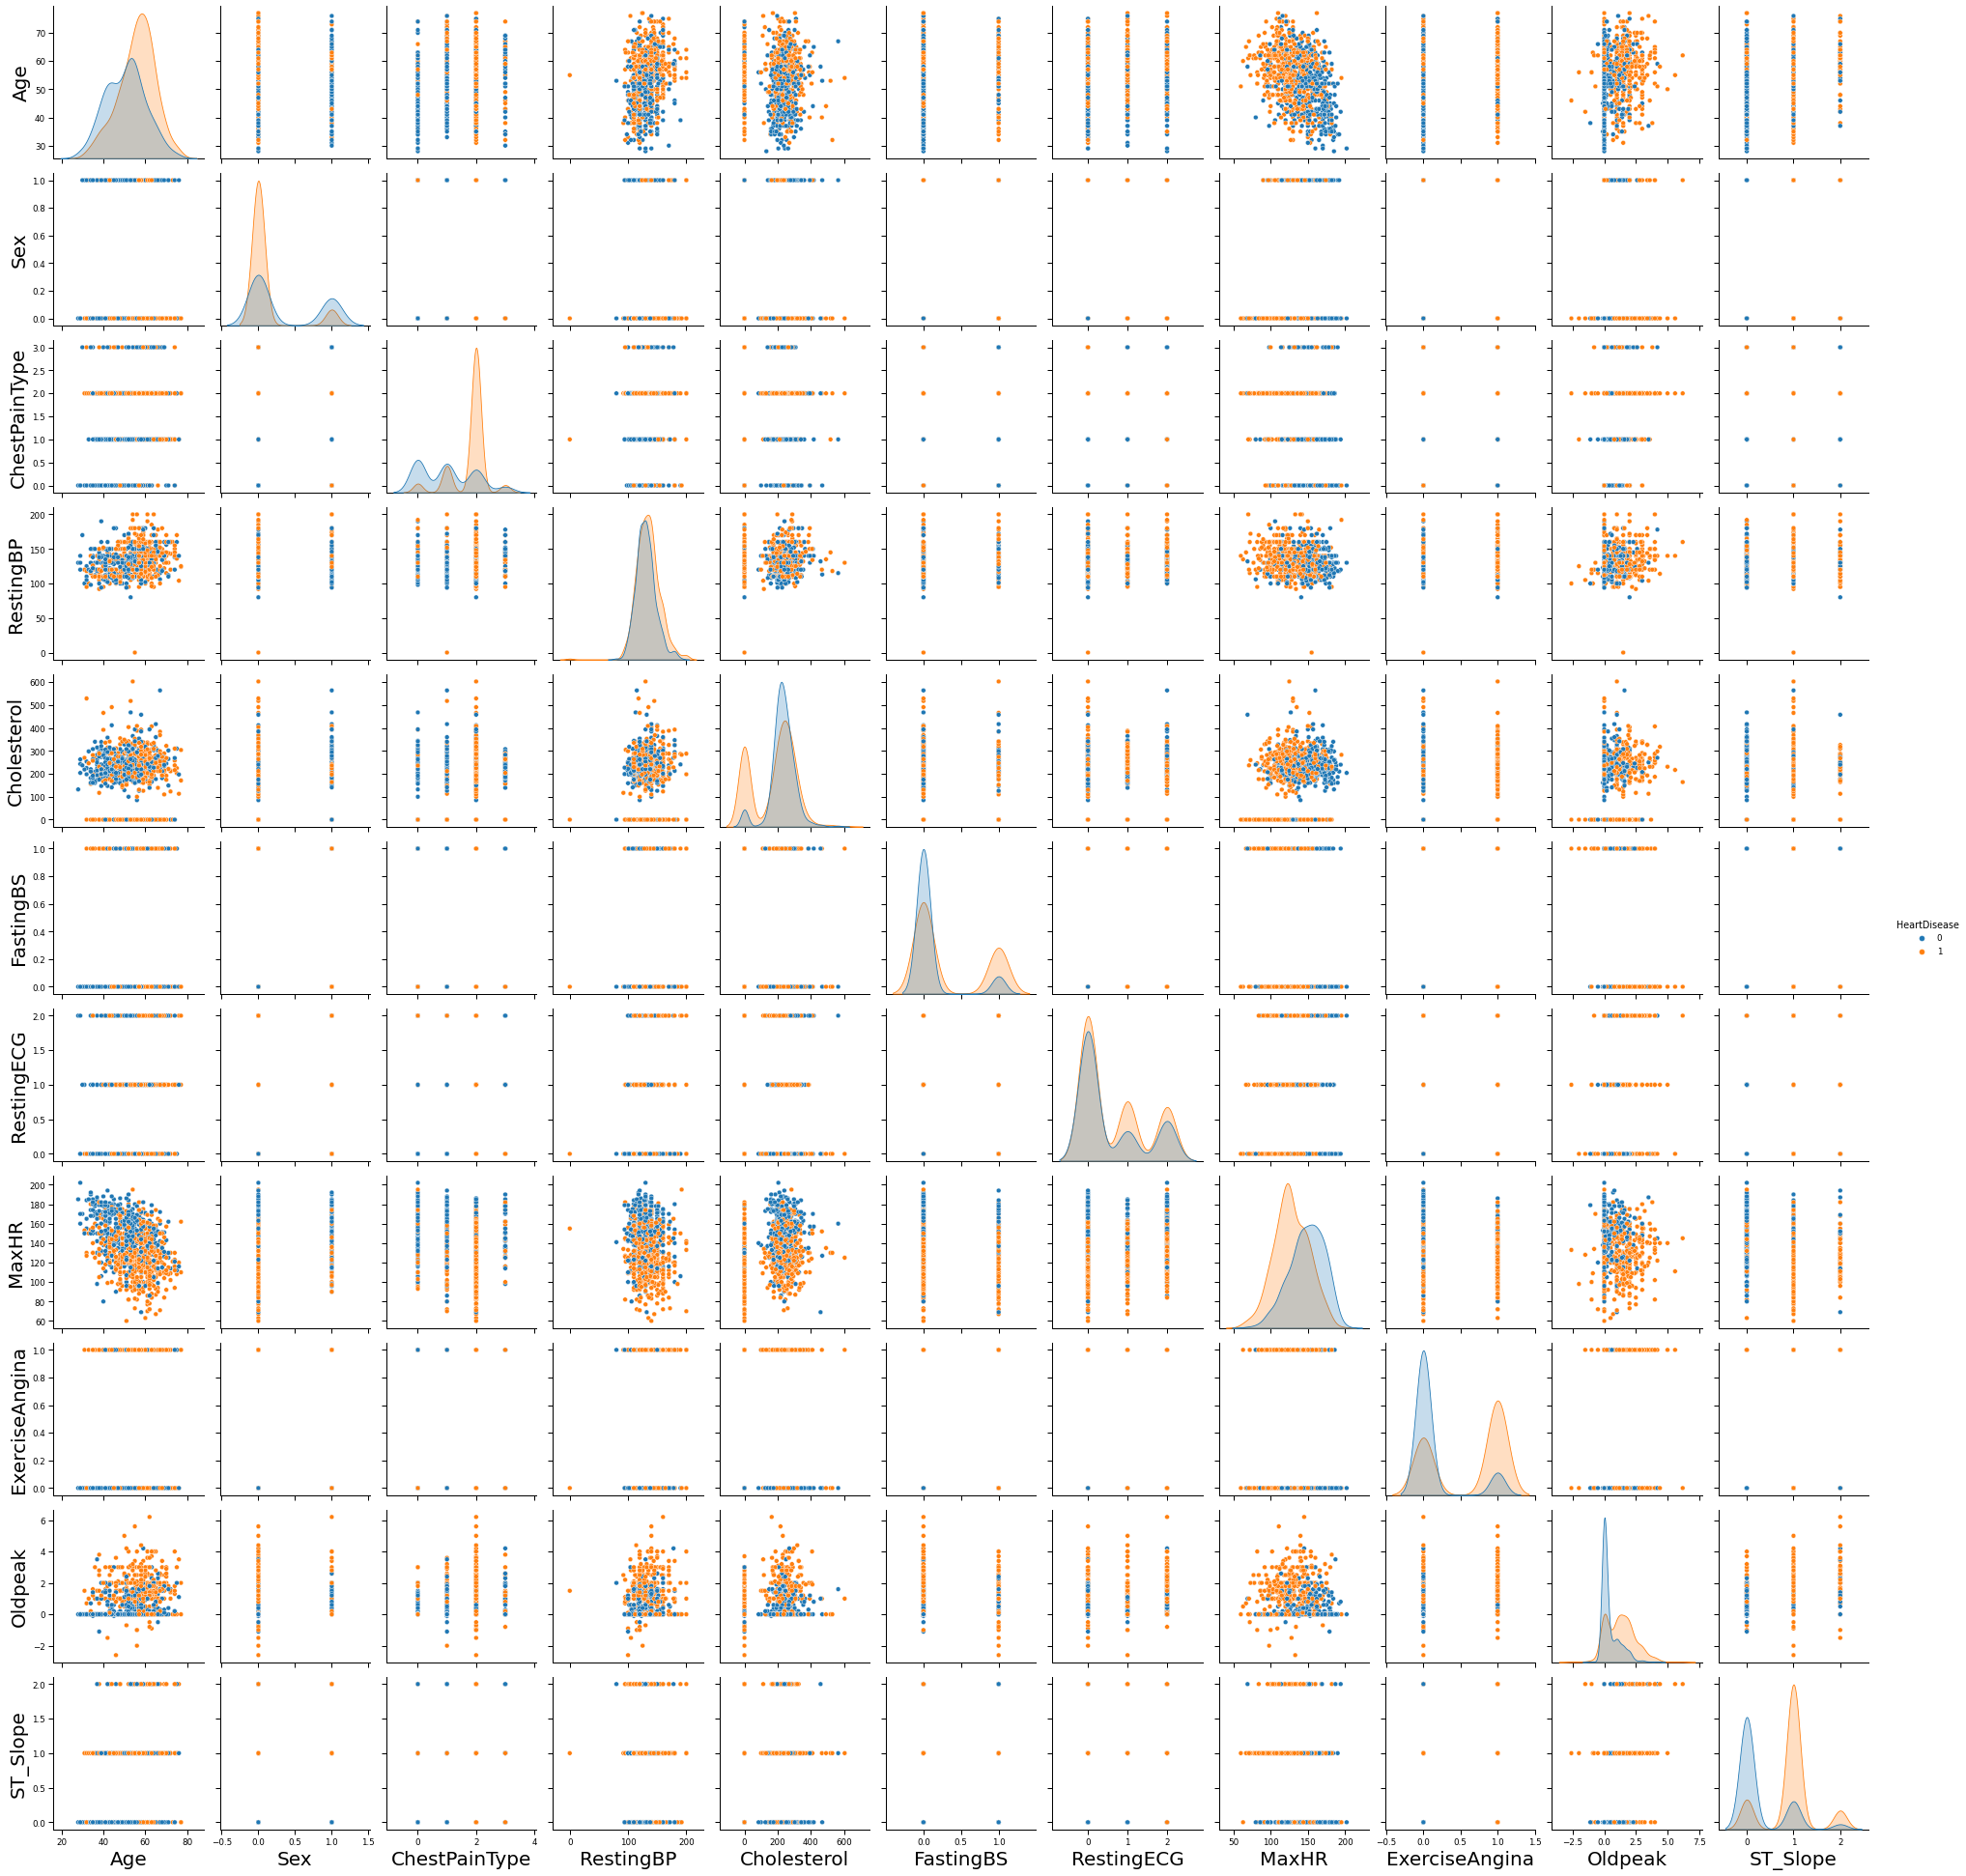

In [ ]:
sns.pairplot(dataset, hue='HeartDisease')

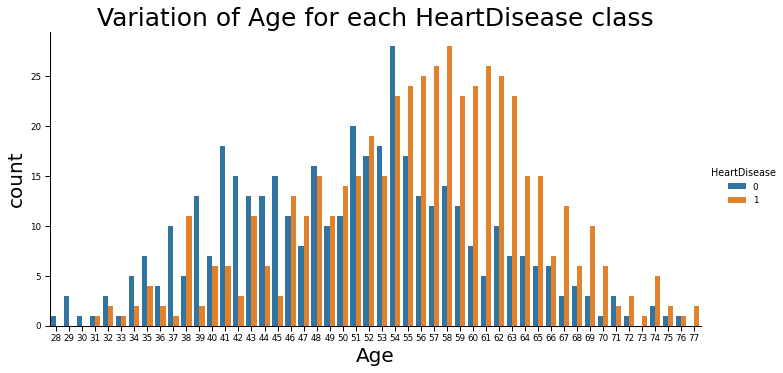

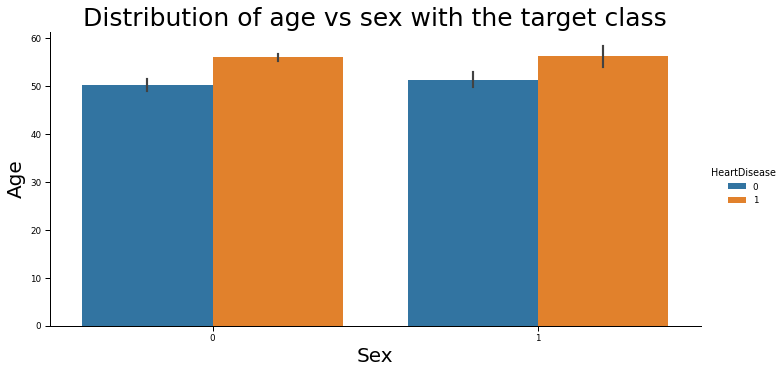

In [ ]:
sns.set_context("paper", font_scale = 1, rc = {"font.size": 12,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = dataset, x = 'Age', hue = 'HeartDisease', order = dataset['Age'].sort_values().unique(), height=5, aspect=2)
plt.title('Variation of Age for each HeartDisease class')
plt.show()

 
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = dataset, y = 'Age', x = 'Sex', hue = 'HeartDisease', height=5, aspect=2)
plt.title('Distribution of age vs sex with the target class')
plt.show()


In [ ]:
negativePat = dataset[dataset['HeartDisease']== 0]
positivePat = dataset[dataset['HeartDisease']== 1]

print('Negative Patients Heart Rate Mean : ', negativePat['MaxHR'].mean())
print('Positive Patients Heart Rate Mean : ', positivePat['MaxHR'].mean())

Negative Patients Heart Rate Mean :  148.15121951219513
Positive Patients Heart Rate Mean :  127.65551181102362


In [ ]:
dataset.nunique(axis=0)

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

# Splitting and Training of Dataset

In [ ]:
data = pd.get_dummies(df, columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [ ]:
data.tail()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
913,45,110,264,0,132,1.2,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0
917,38,138,175,0,173,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
X = data.drop('HeartDisease', axis = 1) # her we are droping the HeartDisease feature as this is the target and 'X' is input features, the changes are not
# made inplace as we have not used 'inplace = True'

y = data.HeartDisease # Output/Dependent variable

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss  = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
test_results = clf.predict(X_test)

In [ ]:
clf.score(X_test, y_test) * 100

82.6086956521739

#### Precision , Recall, F1-Score, Support

1. *Precision* : be “how many are correctly classified among that class”
2. *Recall* : “how many of this class you find over the whole number of element of this class”
3. *F1-score* : harmonic mean of precision and recall values.
  - F1 score reaches its best value at 1 and worst value at 0.
  - F1 Score = 2 x ((precision x recall) / (precision + recall))

4. Support: # of samples of the true response that lie in that class.

        |  T  |  F
    Pos |__TP_|__FP__
    Neg |__FN_|__TN__  

### How To Interpret Confusion Matrix:
- 61 is the amount of **True Positives** in our data, while 161 is the amount of **True Negatives**.
- 51 & 3 are the number of errors.
- There are 51 Type 1 errors (False Positives)- You predicted positive and it’s false.
- There are 3 Type 2 errors (False Negatives)- You predicted negative and it’s false.
- Hence, if we calculate the accuracy its # Correct Predicted/ # Total.
- In other words, where TP, FN, FP and TN represent the number of true positives, false negatives, false positives and true negatives.

> Accuracy = (TP + TN)/(TP + TN + FP + FN).

In [ ]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, test_results)

y_pred_train = clf.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print(cm_test)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

[[ 91  21]
 [ 27 137]]

Accuracy for training set for Random Forest = 0.838006230529595
Accuracy for test set for Random Forest = 0.8260869565217391


## Feature Importance

Feature Importance provides a score that indicates how helpful each feature was in our model.

> **The higher the Feature Score, the more that feature is used to make key decisions & thus the more important it is.**

In [ ]:
clf.feature_importances_

array([2.47767604e-02, 2.01976520e-03, 2.33272933e-02, 1.26365794e-03,
       4.76288006e-02, 6.16816843e-02, 9.51436145e-03, 5.50264920e-03,
       8.59459638e-02, 2.37136156e-02, 3.89801762e-03, 0.00000000e+00,
       2.58102263e-04, 0.00000000e+00, 0.00000000e+00, 9.07228243e-02,
       7.78234982e-02, 8.33495047e-03, 2.73110460e-01, 2.60477596e-01])

In [ ]:
for i,v in enumerate(clf.feature_importances_):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02478
Feature: 1, Score: 0.00202
Feature: 2, Score: 0.02333
Feature: 3, Score: 0.00126
Feature: 4, Score: 0.04763
Feature: 5, Score: 0.06168
Feature: 6, Score: 0.00951
Feature: 7, Score: 0.00550
Feature: 8, Score: 0.08595
Feature: 9, Score: 0.02371
Feature: 10, Score: 0.00390
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00026
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.09072
Feature: 16, Score: 0.07782
Feature: 17, Score: 0.00833
Feature: 18, Score: 0.27311
Feature: 19, Score: 0.26048


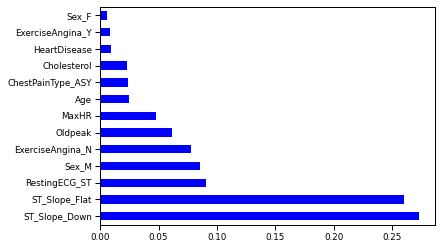

In [ ]:
index= data.columns[:-1]
important_features = pd.Series(clf.feature_importances_, index=index)
important_features.nlargest(13).plot(kind='barh', colormap='winter')

In [ ]:
# print(clf.predict(ss.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])))

In [ ]:
import pickle

model = pickle.dump(clf, open('model.pkl','wb'))

In [ ]:
scaler = pickle.dump(ss, open("scaler.scl", 'wb'))

In [ ]:
print(X_test[1])
print(y_test)

[-0.06370685  0.64619008  2.96553496 -0.52568236 -0.28071031 -0.81997248
 -0.54494926  0.54494926 -1.10867789 -0.48926704  1.91993005 -0.20952909
 -0.50632013  0.8170266  -0.49415185  0.83034552 -0.83034552 -0.25431598
  0.97538084 -0.86288193]
668    0
30     1
377    1
535    1
807    0
      ..
133    1
813    0
734    1
360    1
875    0
Name: HeartDisease, Length: 276, dtype: int64


In [ ]:
clf.predict([X_test[1]])

array([1])